<img src='capstone_1/beer_recommender_images/beershelf.jpg' width="1060" height="360">

<a id='Top'></a>

# Beer Recommender 

[Which beers is the recommender selecting from?](#Which beers is the recommender selecting from?)  
[Where would you get the data for this recommender?](#Where would you get the data for this recommender?)  
[What do these data look like?](#What do these data look like?)  
[How can you use the data to make recommendations?](#How can you use the data to make recommendations?)  
[How do you measure the goodness of the picks?](#How do you score the picks?)  
[What if you just recommend the top-rated beers?](#Using top-rated beers as choices)  
[Can the descriptions of the beers help you choose?](#Using descriptions to predict)  
[Can ratings patterns between different users help out?](#Using user similarities to improve recommendations)  
[(*Utility functions*)](#Utility functions)  

  

The growth of small, independent ("craft") beer brewers in the U.S. has seen a steady increase in recent years, which is evident to anyone who's tried to make sense of the dizzying array of options on a menu or store shelf.  BrewersAssociation.org reports 2018 U.S. sales of all beers shrank 1% by volume from 2017, whereas the craft beer segment grew 4% by volume.  And sales by dollar were even more notable, up 7% from 2017.  Leading this flight to quality in the beer world has been the India Pale Ale (IPA), a hop-heavy (traditionally bitter, yet nowadays also fruity) style originally popular in England but transformed into a new object of desire in modern-day America using modern-day hops. 

The problem for any consumer is trying to sort his way through the maze of new offerings.  At \$10 to \$30 per 4-pack of IPA cans, and with so many brands putting their newest creation in front of you, it's very easy to end up with buyer's remorse after your first sip.  Every one of the thousands of new craft brewers dotting the American map knows that the public wants IPA's, and whether the brewers want to or not, they go after this low-hanging fruit, with often (I'd claim usually) poor results.  Simply put, there are hundreds of expensive yet run-of-the-mill IPA's distracting an undecided buyer from the few gems on the shelf or menu.

Fortunately, the rise of the American IPA has coincided with the rise of social technology, and there are many apps that can help a buyer find her way to something she'll love.  Whether the app has an encyclopedia of detailed reviews and ratings, like BeerAdvocate, or whether it tailors its recommendations to a user based on what the user professes to like and which beers are available to her nearby at any given time, as does Barly, there are data at the consumer's fingertips, ready to help.

<a id='Which beers is the recommender selecting from?'></a>

[Back to the top](#Top)

### Which beers is the recommender selecting from?

Unlike a movie recommender or a book recommender, for example, a beer recommender can't just suggest items from a set collection of choices.  The issue is that most of the best beers aren't available to most users of the app at any given time.  While Netflix can safely choose from its catalog of options for all of its users, a beer recommender is limited to whatever menu the user is staring at in a bar or restaurant.  Here's one from a place that puts a lot of effort into selecting its beer offerings and presenting them to its customers as clearly as possible.  Front and back shown here....  "Have you decided yet, or do you need another minute?"

<img style="float:left; transform:rotate(90deg); width:450px; height:450px" src="croxley1.jpg" />
<img style="float:left; transform:rotate(90deg); width:450px; height:450px" src="croxley2.jpg" />

While many apps and websites offer up the best-rated beers for their users, perhaps even based on what a user has shown interest in, it's just frustrating for that user to be given suggestions that would require flying 3000 miles to purchase.  Barly does attempt to use crowdsourcing and updates from drinking establishments local to the user in order to update its list of available options, but the process quickly falls apart when people stop feeding data into the machine.  

One app that has done a great job of getting people to keep feeding data into the machine is Untappd, turning 10 years old and celebrating its billionth "checkin"--where the User logs in with the beer he's drinking, usually with his rating for it, and sometimes with the venue--sometime in 2020.  An Untappd user can search by location or by beer name, for example, and see results like these: 

 search nearby | search by beer
- | -
![nearbyUntappd](capstone_1/beer_recommender_images/trendingNearbyUntappd.jpg) | ![kingSueUntappd](capstone_1/beer_recommender_images/kingSueUntappd.jpg)

No matter how you navigate the app, you're always given an easy chance to bring your search local, you're shown ordered ratings for the beers on any list, the ratings are meticulously thought out and explained, and you're always encouraged to check in.  A small problem occurs, however, when you scan the top-rated local beers and discover you can't actually buy them at a store or restaurant, because they're beers that people bought on the other side of the country and are drinking at their friend's house, for example, rather than something publicly available.  Another issue is that there isn't really any recommendation specifically chosen for you, but rather just a bunch of group ratings.  Could it be possible to solve both of these problems by asking the app to predict which beer, *out of the ones you're actually looking at on a menu or a shelf,* that *you yourself* would like best?

<a id='Where would you get the data for this recommender?'></a>

[Back to the top](#Top)

### Where would you get data for this recommender?

My plan was to query BreweryDB's API for information on the beers in the style I wanted to focus on, which was IPA.  Why IPA, out of the dozens of styles? First, as mentioned before, it's been a very popular style, and I personally "have domain knowledge" of it. And second, just to narrow the scope of the project a bit, it's good to have some constraints put on it.  At any rate, BreweryDB is a great source of beer knowledge, with API endpoints including ingredients and their detailed physical descriptions, and beers searchable by style.  While this was indeed a good way to amass a list of 15K IPA names, very few of those names actually came with the beer ingredients I had hoped to be able to use to tailor suggestions to individual users.  Furthermore, I needed to join those results to ratings from Untappd's API, but in the world of "wackier-is-better" IPA names, it's not easy to find two places that have the same exact name and spelling for a beer. 

<img src='capstone_1/beer_recommender_images/someCatFromJapanLabel.png' width=900 height=400/>

*SingleCut Beersmiths in Queens, NYC makes labels like this for its acclaimed beers.  Not very easy to find the name, sometimes.  *"Some Cat From Japan"*, in this case. Or perhaps *"Some Cat From Japan IPA"* or *"...Session IPA"*, or something with Japanese characters, depending on what API you're querying.*  
***

Nevertheless, the quickest way to get a ton of IPA ratings from Untappd was to start with the BreweryDB names, query Untappd by *brewer* of those IPA's, sort out which Untappd Users had the most checkins in those results, and then query the first 8000 of those "IPA-centric" users for their most recent 200 checkins each.  The user queries didn't return overall global ratings or written descriptions for the beers though, so I had to then query by beer names for a few more days.  In the end, I discarded any checkins that didn't have user ratings, global ratings, descriptions, or alcohol content ("abv"), since those were crucial features. There were also a surprisingly large number of users who had checked in more than once for the same beer, often dozens of times (They have their reasons, I guess.), so I removed all but one for each. Finally, I got rid of all beers and all users that appeared in the data fewer than 4 times, in order to focus on discernible patterns more clearly.  All of that reduced the data from about 2.4 million checkins to about 1 million.   [[[LINK TO CODE]]]

<a id='What do these data look like?'></a>

### How does this arbitrary sample of 1 million from the entire Untappd history compare to the other 900M+ checkins?

[Back to the top](#Top)

Take a peek at a few random checkins:

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns   # just for the styles
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
checkins = pd.read_csv('checkins.csv')
checkins.sample(3)

,checkin_id,beer_id,user_id,rating_user,brewery_name,beer_name,beer_style,rating_global,abv,beer_description
381344,773203606,630759,1358640,3.75,MadTree Brewing Company,Rounding Third,IPA - Red,3.73864,6.5,Brewed to celebrate the start of our favorite ...
967242,773247335,2575528,1494703,4.00,Pure Project Brewing,Prophet,Sour - Other,4.06393,6.6,2018 Cellar Cyndicate Bottle Club Exclusive - ...
43277,819901166,1353,941352,4.50,Goose Island Beer Co.,Goose IPA,IPA - English,3.52491,5.9,Goose Island’s flagship IPA is a six-time meda...


For starters, the data are skewed heavily towards recent checkins, due to the way I queried Untappd.  Using the chronologically-assigned checkin ID's as a proxy for date, this becomes clear:

<img src='capstone_1/beer_recommender_images/ratings_chrono_distr.jpg' width=600/>

Since the data samples are so heavily weighted toward the present, there might be concerns that conclusions drawn analyzing them will too heavily reflect the rater’s most recent tendencies.  But that actually turns out to be a benefit to this project, which seeks to predict the most recent ratings of users, in an effort to simulate the intended situation, where a machine recommends a purchase for a user, based on how the user previously rated items.  No matter how a user’s tendencies and tastes may change over time, the most accurate conclusions about current preferences will be based on most recent preferences.  Furthermore, many beers come and go fairly quickly in today’s marketplace, and brewing techniques are evolving quickly enough that particular ingredients, beers, or styles of beer from which a user is choosing may only have been rated by this user or other users during the previous few months. 

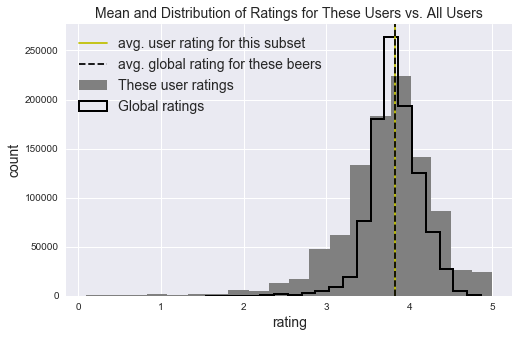

In [6]:
plt.figure(figsize=(8,5))
plt.hist(checkins.rating_user, bins=20, color='grey', label='These user ratings')
plt.hist(checkins.rating_global, histtype='step',
         color='k', bins=20, label='Global ratings', lw=2)
plt.xlabel('rating', fontsize=14)
plt.ylabel('count', fontsize=14)
plt.axvline(x=checkins.rating_user.mean(), color='y',
            label='avg. user rating for this subset')
plt.axvline(x=checkins.rating_global.mean(), linestyle='--',
            label='avg. global rating for these beers', color='k')
plt.title('Mean and Distribution of Ratings for These Users vs. All Users', fontsize=14)
plt.legend(fontsize=14);

Our subset of checkins seems to be very representative of the population it was sampled from.  The mean rating for these checkins is the same as the global ratings for the same group of beers.  The deviation from the mean is of course greater for the subset, having fewer ratings per beer.

#### What portion of the checkins are actually for IPA's?

In [7]:
n_ipas = sum(checkins.beer_style.str.startswith('IPA'))
print(f'Out of the {len(checkins)} total checkins here, \
{n_ipas} are for IPA\'s ({np.round(100 * n_ipas / len(checkins), 2)}%)')

Out of the 976861 total checkins here, 579026 are for IPA's (59.27%)


And let's see what our top 20 styles are, by number of checkins:

In [8]:
checkins.groupby('beer_style').size().sort_values(ascending=False).head(20).to_frame(name='count').reset_index()

,beer_style,count
0,IPA - American,231627
1,IPA - New England,120038
2,IPA - Imperial / Double,102795
3,Pale Ale - American,40863
4,IPA - Imperial / Double New England,37253
5,IPA - Session / India Session Ale,21702
6,Stout - American Imperial / Double,16700
7,Stout - Imperial / Double,13769
8,IPA - Milkshake,13721
9,Sour - Fruited,13275


By narrowing the focus to IPA's and also to recent checkins, hopefully there will be more overlap between the beers that any given pair of users rated.  When it comes down to relying on one user's ratings to help recommend a beer for another user, we're going to need as many common beers rated as possible between the two users, to make sure that their taste preferences are actually correlated.  After all, even with the style and time constraints assisting us, look at how sparse our User-Beer "matrix" of checkins is:

In [9]:
n_users = checkins.user_id.nunique()
n_beers = checkins.beer_id.nunique()
n_ratings = len(checkins)
print(f'There are {n_users} different users in our data, and')
print(f'{n_beers} different beers, for a total of {n_users * n_beers} possible ratings.')
print(f'The {n_ratings} actual ratings are only {np.round(100 * n_ratings / n_users / n_beers, 2)}% of that total.')

There are 28185 different users in our data, and
58907 different beers, for a total of 1660293795 possible ratings.
The 976861 actual ratings are only 0.06% of that total.


#### To get a visual on that 0.06% density, here's a 100x100 grid with 6 squares filled in:

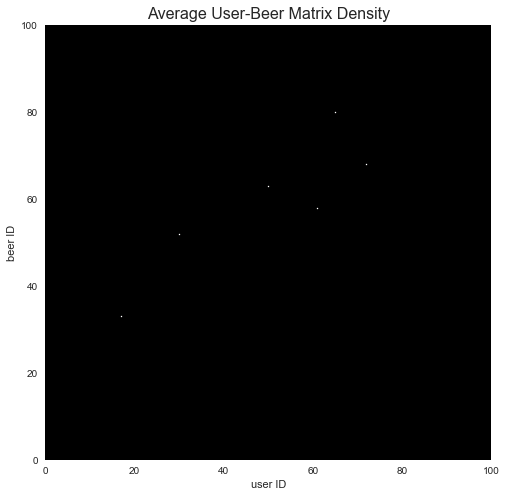

In [10]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(1,1,1)
ax.set_facecolor('k')
ax.grid(False)
plt.scatter((17, 30, 50, 61, 65, 72), (33, 52, 63, 58, 80, 68), marker='s', color='w', s=1)
plt.xlim(0,100)
plt.ylim(0,100)
plt.xlabel('user ID')
plt.ylabel('beer ID')
plt.title('Average User-Beer Matrix Density', fontsize=16);

Our actual matrix is 589 of these grids tall (for the beers) and 282 grids wide (for the users).  Let's hope the checkin stars tend to align more along the x and y axes than this representation of a constellation does.  To be exact, the patterns we want to see are axis-aligned rectangular lattices, where a subset of users all rated a subset of beers.

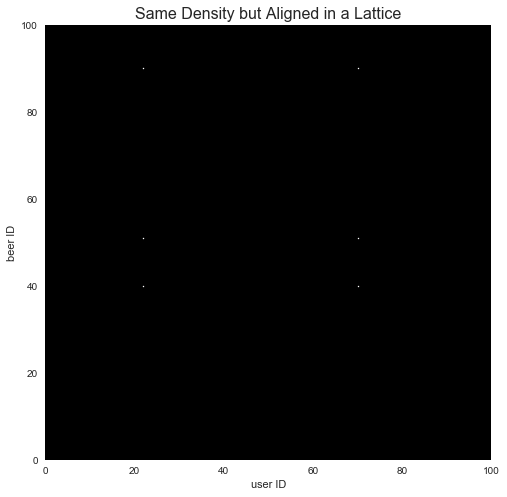

In [11]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(1,1,1)
ax.set_facecolor('k')
ax.grid(False)
plt.scatter((22, 22, 22, 70, 70, 70), (40, 51, 90, 40, 51, 90), marker='s', color='w', s=1)
plt.xlim(0,100)
plt.ylim(0,100)
plt.xlabel('user ID')
plt.ylabel('beer ID')
plt.title('Same Density but Aligned in a Lattice', fontsize=16);

Since we have twice as many beers as users, this is in fact how our lattices will appear, with more points along each vertical lattice line than along each horizontal one.  As a result, we'll get better recommendations by comparing how pairs of vertical lines (users) correlate than by comparing pairs of beers.  But first....

### How about a few quick charts to break down the ratings?

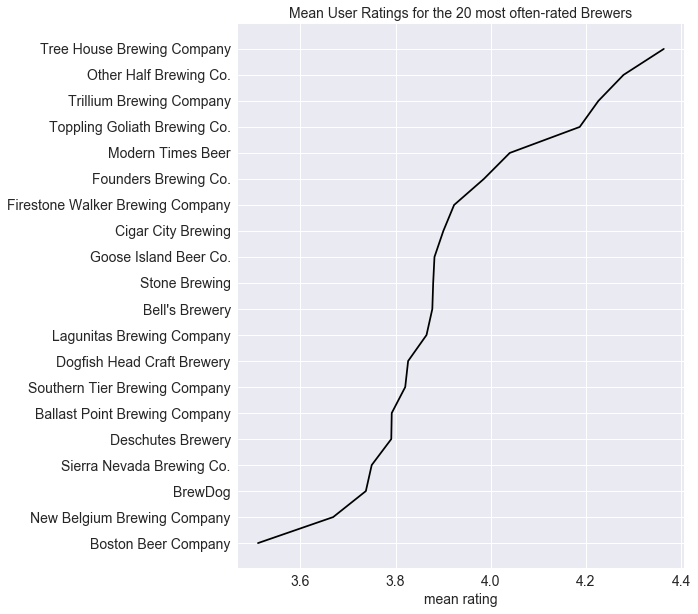

In [12]:
# the following utility function is defined at the bottom of the notebook  [[[LINK TO BOTTOM?]]]
topXratings(checkins, 'brewery_name', x=20, xlab='mean rating',
            title='Mean User Ratings for the 20 most often-rated Brewers')

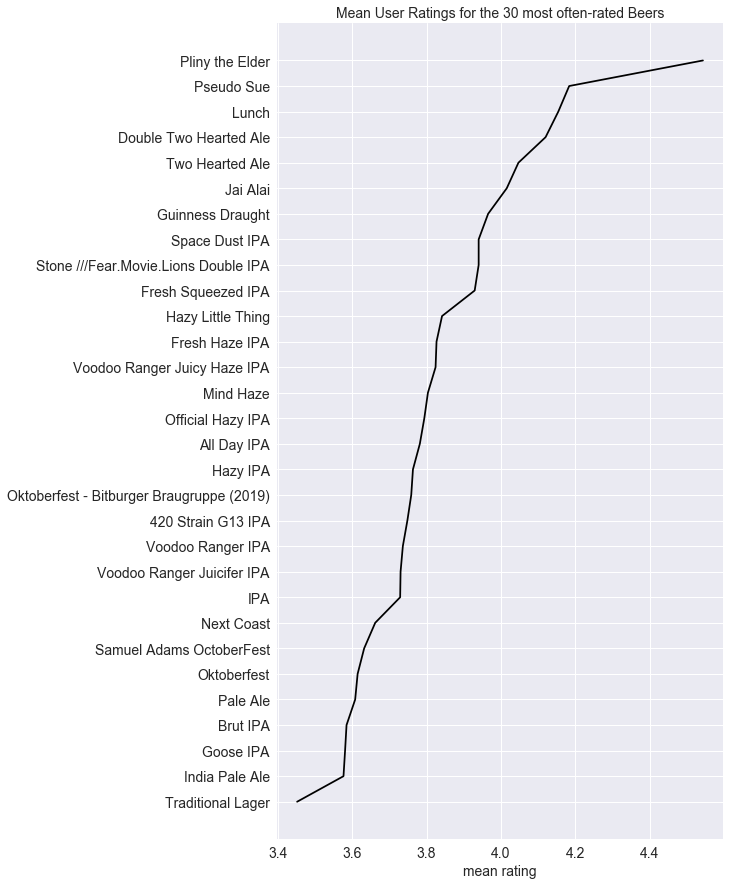

In [13]:
topXratings(checkins, 'beer_name', x=30, xlab='mean rating',
            title='Mean User Ratings for the 30 most often-rated Beers')

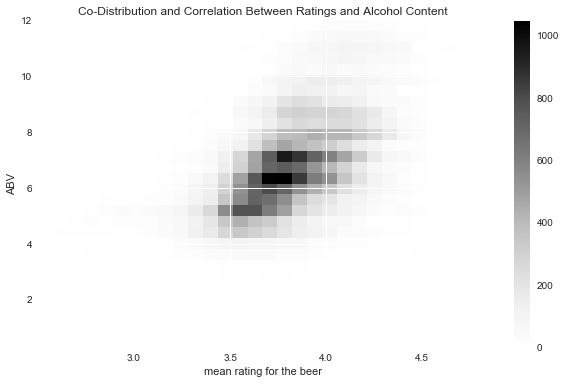

In [14]:
bybeer = checkins[(checkins.abv < 12) & (checkins.rating_global > 2.5)].groupby('beer_name').mean()
plt.figure(figsize=(10,6))
plt.hist2d(bybeer.rating_global, bybeer.abv, bins=30)
plt.colorbar()
plt.ylabel('ABV')
plt.xlabel('mean rating for the beer')
plt.title('Co-Distribution and Correlation Between Ratings and Alcohol Content', fontsize=12);

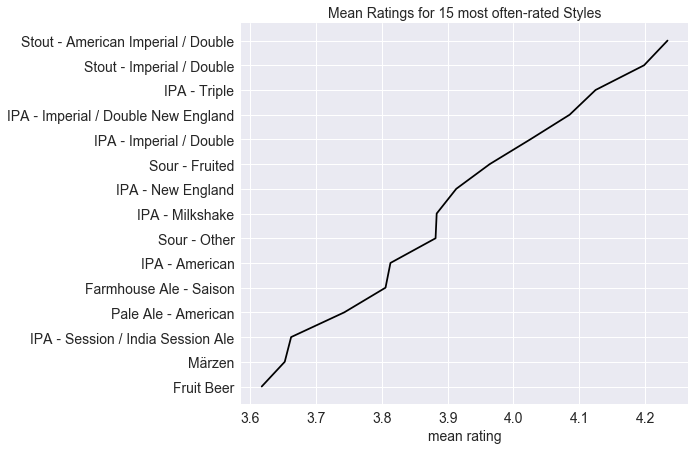

In [15]:
topXratings(checkins, 'beer_style', x=15, title='Mean Ratings for 15 most often-rated Styles')

#### Hop-loving readers, or perhaps brewers considering what ingredients to brew with next, may be interested in charts like this:

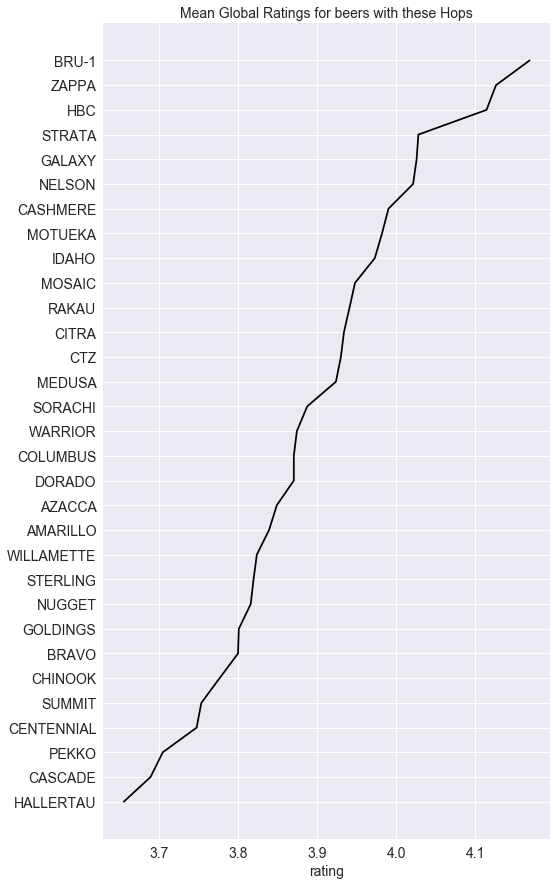

In [16]:
# (This util func is defined at the bottom of this notebook)
hop_rates = [rate_word(checkins, hop) for hop in hops]  # hops is a list of hop names, found at bottom of notebook
plot_str_keys(hop_rates, title='Mean Global Ratings for beers with these Hops', xlab='rating')

Some words I've seen used in beer descriptions:

HOPPY appears in 43045 checkins.
BITTER appears in 133852 checkins.
HAZY appears in 55626 checkins.
TROPICAL appears in 127065 checkins.
NEW ENGLAND appears in 255 checkins.
FRUIT appears in 240341 checkins.
SMOOTH appears in 81855 checkins.
PINEAPPLE appears in 52847 checkins.
MANGO appears in 50246 checkins.
MELON appears in 24530 checkins.
PAPAYA appears in 13825 checkins.
DANK appears in 31355 checkins.
YEAST appears in 56102 checkins.
CLASSIC appears in 39137 checkins.
INTENSE appears in 32330 checkins.
AROMA appears in 213084 checkins.
PINEY appears in 16255 checkins.
SPRUCE appears in 1806 checkins.
FOREST appears in 2384 checkins.


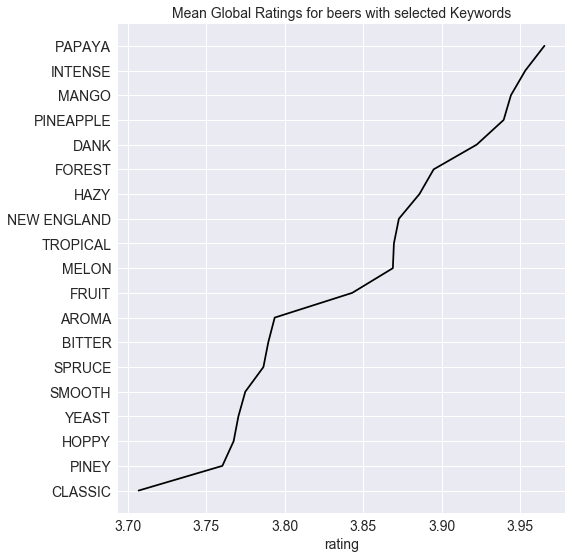

In [17]:
descriptors = ['hoppy','bitter','hazy','tropical','new england',
               'fruit','smooth','pineapple','mango','melon','papaya',
              'dank','yeast','classic','intense','aroma','piney',
              'spruce','forest']
# set verbose=True to see how many times the words appear.
descr_rates = [rate_word(checkins, word, verbose=True) for word in descriptors]
plot_str_keys(descr_rates, title='Mean Global Ratings for beers with selected Keywords', xlab='rating')

[For further exploration of some features that I ultimately cut out from the data, such as checkin dates, venues and brewery locations, see this other notebook: [link to DataStory.ipynb].  You'll find out where people like to check in from and what kinds of ratings those places get, explore who might be trying to pad some stats, discover how the mean longitude for checkins has shifted 25 degrees to the east in the past 3 years, and visualize Untappd's growth history, among other topics and charts.]

<a id='How can you use the data to make recommendations?'></a>

<a id='How do you score the picks?'></a>

[Back to the top](#Top)

## How can you use the beer features shown above to make recommendations?

The intent here is to provide an app user with a few informed recommendations for purchase, in a situation where that user is unfamiliar with the menu or shelf of beers he or she is facing.  The recommender isn’t sponsored by anyone trying to give any product a leg up in the sales or ratings charts, so its aim is simply to help its user make good choices.  It’s no fun making predictions/recommendations unless we have some empirical way to measure our results, so we’ll state our scoring system clearly as we go, and customize it as necessary.  To begin with, we’re building a predictor based on past ratings of users of this app.  Rather than using all the ratings we have by those users to learn how each user rates beers, and then going out and waiting to test how each user rates the recommended beers tonight, it’s much more effective to set aside the most recent several ratings by each user, and see how they compare to what a predictor model recommends, based on the user’s ratings before those recent ones.  Even with that as a starting point, how exactly do we measure the goodness of the model’s predictions?

A common way to measure predictions like these is to use the Root Mean Squared Error (RMSE).  For each prediction, we take the square of how far off the prediction was from the true rating, and then we take the average of all those squares and then the square root of that average.

<img src='RMSE_chart.png' width=800/>

This measure is used by many standard machine learning models as a cost to minimize when they fit their data, so it’s convenient to use as a gauge of performance.  But we aren’t playing an accuracy game with the app user, we’re tasked with recommending one beer or maybe a few beers to her, and we need a way to measure how she rated the beers we recommended vs. how she rated the beers we didn’t recommend.  To simulate this situation, it’s useful to imagine that this user is looking at a menu of a set number of choices, say 10 beers.   Then say we want to recommend the 3 of those 10 that we think she’ll rate highest, in order.  Note that we just moved the target:  First we spoke of attempting to predict the ratings as closely as possible, and now our aim is to see how well we ranked the beers, and in particular how well we ranked the top 3.  So how do we measure this? 

A made-up example should help:

<img src='scoring_examples.png' width=600/>

If the user only had one chance to order, and she trusted our app, she ordered Beer D, which turned out to be her second-least-favorite one, so the recommender failed, it appears.  But upon closer inspection, it was also her second *favorite*, because of her tied ratings.  There are generally a lot of tied ratings in Untappd, so we need a way to deal with them when scoring.  To make a fair assessment here, a choice of Beer D as the top pick should be considered about as good as picking blindly:  There were as many better beers (just Beer A) that could’ve been chosen as there were worse beers (just Beer E), from the user’s standpoint.  The choice of Beer E as a second pick, however, is an indicator of poor performance.  Even after Beer D had been selected first, there were still 3 better choices than E and 0 worse picks left.  This system’s score should definitely be penalized, to the point that no matter how well it does on its third pick, it scores worse than just picking randomly.  As it turns out, it does pick the top user pick as its third pick, but in a performance sense, the damage has already been done.  It would’ve been much better to pick the top pick second and then the worst pick third, because the user is presumably moving down the list from top pick to bottom pick, and may have uninstalled the app after the poor second pick.

So for our custom scorer here, we'll keep of track of two running totals for each choice we select for the user:
The numerator will count how many picks would've been better than the actual recommendation at each step, adjusting the remaining available choices by removing the chosen picks as we proceed.  Meanwhile, the denominator will tally how badly things could've gone wrong, if the machine chose the worst pick at each step and then removed it from the available choices for the next step.  Essentially, this scorer will measure how bad the picks are compared to the worst ones, but then at the end, in a happy twist, it'll subtract this failure measure from 1, and we'll call the result a "rank accuracy score", which sounds much better than "failure measure".  [[[CODE  LINK TO BOTTOM?]]]  

How do our previous D-E-A recommendations do?

$ rank\ accuracy\ score = 1 - \frac{sum\ of\ actual\ failures}{sum\ of\ possible\ failures} $  <img style="float:left; width:350px" src="capstone_1/beer_recommender_images/user_ranked_example.png" />

<img style="float:left; width:800px" src='rank_score_example.png' />

As shown in the table above, the rank accuracy score for these 3 picks is 0.33, which is worse than the average of blindly guessing (that turned out to be approx. 0.54, for 3 recommendations out of a 10-beer menu).

<a id='Using top-rated beers as choices'></a>

[Back to the top](#Top)

### How would Untappd's "Top Rated Beers"  do with this rank accuracy scorer, if we used it as a list of recommendations?

This is a good baseline score to calculate, to see if we can improve upon it afterwards.  Although Untappd actually lets you specify a distance radius from your location and then uses a Bayesian Average of all checkins in that area over the last 15 days, that's not the global ratings our dataset has, so I'm going to use our global ratings and treat each user's rated beers as the beers that were available in the area when the user rated them.

In [22]:
# a mapping from user to number of ratings can be helpful in many situations
usercounts = checkins.groupby('user_id').size()
# get "menus" of 10 beers for the users with more than 10 checkins
tens = checkins[checkins.user_id.map(usercounts) > 10].set_index('user_id').sort_index()
_, tens = split_last_X(frame=tens, countDict=usercounts, X=10)  # util func defined below
print(f'{len(tens) // 10} of these users have at least 10 checkins.')

8443 of these users have at least 10 checkins.


Here's the "digital menu" for the first of those 8443:

In [23]:
t = tens.head(10).reset_index()
t[['brewery_name', 'beer_name']]

,brewery_name,beer_name
0,Ninkasi Brewing Company,Dawn of the Red
1,Abita Brewing Company,Purple Haze
2,Ballast Point Brewing Company,Coconut Victory at Sea
3,Allagash Brewing Company,Black
4,Schlafly - The Saint Louis Brewery,IPA
5,Lancaster Brewing Company,Kölsch
6,Berkshire Brewing Company (B.B.C.),Coffeehouse Porter
7,Catskill Brewery,Ball Lightning Pilsner
8,Sierra Nevada Brewing Co.,Torpedo Extra IPA
9,Upper Hand Brewery,Upper Peninsula Ale (UPA)


Here's how we could use Untappd's global ratings to make recommendations for this user:

In [24]:
t[['beer_name', 'rating_global']].sort_values('rating_global', ascending=False)

,beer_name,rating_global
6,Coffeehouse Porter,3.88812
2,Coconut Victory at Sea,3.84764
3,Black,3.79909
0,Dawn of the Red,3.75159
8,Torpedo Extra IPA,3.74144
9,Upper Peninsula Ale (UPA),3.64934
4,IPA,3.50142
7,Ball Lightning Pilsner,3.47867
1,Purple Haze,3.41347
5,Kölsch,3.32362


...and here's how this user actually ranked them:

In [25]:
t[['beer_name', 'rating_user']].sort_values('rating_user', ascending=False)

,beer_name,rating_user
8,Torpedo Extra IPA,3.50
4,IPA,3.00
5,Kölsch,3.00
7,Ball Lightning Pilsner,3.00
3,Black,2.50
6,Coffeehouse Porter,2.25
1,Purple Haze,2.00
0,Dawn of the Red,1.75
9,Upper Peninsula Ale (UPA),1.75
2,Coconut Victory at Sea,1.25


Those picks weren't good for this particular user. Scoring the top 3 recommendations, "Coffeehouse", "Coconut", and "Black", we should see a poor rank accuracy, since they got ranked 6th, 10th, and 5th by the user.

In [26]:
rank_acc = untied_rank(t.rating_user.values, t.rating_user.values[np.argsort(t.rating_global.values)[:-4:-1]])
print(f'The rank accuracy of the top 3 global picks for this first user is only {np.round(rank_acc, 3)}')

The rank accuracy of the top 3 global picks for this first user is only 0.261


But let's see how it does on all 8443 users--

In [28]:
scores = []
for u in tens.index.unique():
    uten = tens.loc[u, ['rating_user','rating_global']]
    scores.append(untied_rank(uten.rating_user.values, 
                              uten.rating_user.values[np.argsort(uten.rating_global.values)[:-4:-1]]))
mean_rank_acc = np.round(np.mean(scores), 3)
print(f'The average score picking the top 3 globally rated for {len(scores)} "menus":  {mean_rank_acc}')

The average score picking the top 3 globally rated for 8443 "menus":  0.774


That looks a lot better.  Let's take a look at someone whose global picks scored 0.773, to get a feel for how good the mean score for all 8443 users is.

In [29]:
t = tens.iloc[15290:15300, :]
t.reset_index()[['beer_name', 'rating_global']].sort_values('rating_global', ascending=False)

,beer_name,rating_global
9,Megafauna Imperial IPA,4.14691
5,Supernelson,4.11953
1,Imaginary Friend,3.91043
4,Limb From Limb Rye PA,3.85395
8,33B-EXP.003.MKI DOUBLE DRY HOPPED HAZY IPA,3.80189
6,HOPful Aspiration,3.74722
3,Snake Island CDA,3.74275
2,Rye Cycle Fresh Hopped Ale,3.68605
7,Das Brut IPA,3.57258
0,Old Growth ISA,3.21667


Those are the global top picks, and here are the user's actual rankings:

In [30]:
t.reset_index()[['beer_name', 'rating_user']].sort_values('rating_user', ascending=False)

,beer_name,rating_user
9,Megafauna Imperial IPA,4.50
8,33B-EXP.003.MKI DOUBLE DRY HOPPED HAZY IPA,4.25
3,Snake Island CDA,4.00
4,Limb From Limb Rye PA,4.00
5,Supernelson,4.00
6,HOPful Aspiration,4.00
1,Imaginary Friend,3.75
2,Rye Cycle Fresh Hopped Ale,3.75
0,Old Growth ISA,3.50
7,Das Brut IPA,3.50


The user agreed with the rest of the world on the top pick, the second global pick was in the group of beers she had tied for third in her ratings, and the third pick was only tied for her 7th favorite.  
On balance, that seems like a pretty useful system.  Previous global means are definitely correlated with individual user ratings.  But we also saw in some charts above that alcohol content was also correlated with user ratings, as were words in the beer's description, so maybe we can use those features to do a little better.  Here are the correlations between some components of checkin ratings:  <img src='capstone_1/beer_recommender_images/correlation_half_matrix.png' width=700/>

(I included Checkin ID as a proxy for time, in case it turned out that ratings or abv's were changing over time, and though it appears that global ratings are moving slightly higher with time, the correlation is weak-- 0.07)

<a id='Using descriptions to predict'></a>

[Back to the top](#Top)

## What can we do with beer descriptions and abv's to tailor the recommendations to specific users, in hopes of improving upon the baseline global mean rating picks?

I used a bag-of-words representation of the descriptions, where the entire vocabulary for all the beer descriptions, brewers, and names was reduced to ignore words that appeared in too few or too many descriptions.  To give you an idea of where I set the threshold for what was ignored for appearing too often, I used a scikit-learn CountVectorizer with the max document frequency set to about 1/6.  So if a word appeared in more than 1 out of 6 beer descriptions (I used one instance of each beer description to fit things, regardless of whether that beer had 2000 checkins or 20), it wasn't given an index in the word vector.  This threshold counted words like "dry" and "hop", but not "ale" or "brewed".  For each beer, a binary vector as long as the reduced vocabulary--about 20K words--was created, with 1’s for words appearing in that beer’s text and 0’s for the others.  I added the abv as a final, numerical column, dividing it by 5.0 to scale it down closer to the values of the word vectors (1's).  Most beers have an abv between 5 and 10, so the column I added ranges from 1.0 to 2.0, for the most part.

[[[CODE LINK]]]

I wanted to first simulate a situation where a menu had a new beer that didn't have ratings, or not enough ratings to have settled into a stable global mean yet.  This situation also relates to a brewer deciding what beer to brew, where the goal is to achieve high ratings.  The RMSE for predicting how such a beer will be rated overall, by simply predicting the mean of the global means (about 3.8), is around 0.277, which is also the standard deviation for global ratings, since they're distributed normally.  Using linear regression, a scikit-learn SGD model fit a 20K-dimensional line to the 82K training word/abv vectors.  The RMSE for the test predictions from that model dropped all the way to 0.187.   As far as how that translated to the rank accuracy scores of user menus, it took them from 0.54 for blind top 3 picks to 0.67.  Recall that predictions based on known global means scored 0.774, so the words and abv's got us over halfway to the world where we know all global means ahead of time from thousands of ratings.

To get a sense of how the model weighted abv and individual words when it predicted unseen beers, we can look at the terms that had the highest weightings, either positive or negative.  Here are the “heaviest” 30 weights, along with the words they weigh.  Since the binary vectors stop counting after 1 occurrence of each word in each description, it’s easy to interpret these weights and their effect on the predictions.  If the word appeared in the beer’s text, the prediction moved by exactly the amount indicated by the chart’s bar.   [[[CODE LINK]]]

<img src='capstone_1/beer_recommender_images/influencers.png' />

For example, we can see how “busch” and “anheuser” had approximately equal negative effect on predictions, around -0.23.   The reason is that Anheuser-Busch is the name of a large brewer of somewhat poorly-rated beers, and so the -0.46 that the model learned to associate with their brand name was split evenly between the 2 terms.  It’s worth keeping in mind here, the predictions were only made on beers whose descriptions hadn’t been seen by the model previously.  The words themselves had mostly been seen in other descriptions that were trained on, and the model learned that any time the word “farmstead” appeared, for example, it was associated with a +0.40 effect on the target rating.  Hill Farmstead is a brewer of highly-rated beers, but “hill” is not as exclusively linked to “farmstead” in the vocabulary as "anheuser" is to "busch", so “hill” doesn’t appear in the top words.

Also note that ‘ABV’ was included in the chart above to show its relative importance in predicting ratings.  It’s not the word ‘ABV’, but rather the numeric column that was appended to each word vector for each beer. The resulting abv weighting shown in the second bar above, approximately +0.49, tells us that a beer with 10% abv received a 0.49 higher predicted rating component than one with 5% abv, from that specific model weight (recall that abv was scaled by 5.0).   The learned intercept for the model, meaning the value it would predict for a new beer that had 0.0 abv and none of the vocabulary words in its description, was 2.99.  From that starting point, beers with 5% abv got 0.49 added to their predictions, beers with “Pabst” in their descriptions got 0.31 deducted from theirs, etc., for all 20K features/weights.  The model learned that the most efficient way to minimize the RMSE for unknown beers was to start with a rating of 3 and then use the abv and the brewer's name to get near the target rating.  After that, the descriptive words such as ingredients help the model fine-tune its predictions, but those features typically carry much lower weights than abv and names.

### Now can we use that same technique for individual users?

We can try.... After all, it would make sense that specific users like or dislike beers by specific brewers, or with specific levels of alcohol, or with certain ingredients that are listed in the descriptions.   The training is already done by the time the user is deciding, so the prediction is instantaneous.  But the problem is that there’s just not a strong enough signal coming from the data for one user, until he makes about 165+ ratings.  Too many words for beers being predicted don’t appear when training the model, for example.  And the random noise that every rating inherently contains is not filtered out when it’s just one user rating one beer, as opposed to thousands of users with varying tastes contributing to a mean rating for a beer.  It’s too easy for the single-user model to overfit by focusing large weights on words that just appear in one or two beers out of the user’s known rating history and then appear nowhere on the testing shelf of real life.  Nevertheless, as users continue to rate beer after beer, the rank accuracy does begin to show stronger results than just picking the global favorites, as shown in the chart on the right, below:  

[[[CODE LINK]]]


<img style="float:left; width:1000px" src="capstone_1/beer_recommender_images/prediction_errors2.png" />

The GBR predictions, shown by the dotted lines in both charts, refer to the predictions made by the GradientBoostingRegressor trained for each user, to fit binary word vectors that were also fit for each user individually.  All users with at least 25 checkins were considered, and to keep things in line with previous scenarios, the last 10 checkins for each user were treated as the “testing menu”, so that the minimum number of checkins for a training set was 15, on the left side of both charts above.  The sizes were binned, to smooth out individual deviations and make the trends clearer.  As far as the solid grey lines in each chart, those show how predictions based solely on the global mean for the same checkins performed.  

Actually, a very important point is that the globally-based predictions of the left chart, which consistently outperformed anything based on patterns learned by the GBRegressor, were in fact adjusted by amounts according to how the user’s ratings were biased either higher or lower than the beers’ global ratings.  For example, if a user rated 20 beers whose average global mean was 3.50, and the user’s average rating for those 20 beers was 3.75, we need to account for that 0.25 average “generosity” that the user seems to have.  Instead of just using the global means for the 10 test beers as our predictions, we need to add 0.25 to every one of them, and that’s what gives those predictions such a low RMSE, as shown by the solid grey line in the left-side chart above, which continues to strongly decrease as the number of “training” checkins increases.  Now in the chart on the right, there’s no need to account for that user’s bias/generosity, because it won’t change the relative rankings of the 10 test beers, being that we add the same amount to each one.  We ideally would like to consider the user’s bias, but not divide it up evenly amongst the user’s test beers, even though that works so well.  We want to give more of the bias to beers that somehow are more similar to ones the user gave more of it to in previous checkins with ratings that were more above (or below, for negative biases) the global mean.  Unfortunately, as the dotted line in the left-hand chart above showed, the model was never able to figure out how to divvy up the generosity of such a user.  Each user’s individual model was trained on vectors fit to that user’s specific training beer vocabulary, and the targets were how much and in which direction each training beer deviated from the expected user rating after considering global mean and user bias.  For example:


<img src='capstone_1/beer_recommender_images/joe_bias1.png'/>

If these are user Joe’s three training rows, and we aim to minimize the RMSE for any test rows, we have to account for the fact that Joe rates beers 0.25 higher than their global means, overall.  But look at beers ‘A’ and ‘C’.  The global mean predictions, which do so well overall, would score the two similarly, i.e. 3.50 predicted for both (3.25 global mean + 0.25 Joe bias). Yet Joe rated ‘C’ much higher than he rated ‘A’.   With this in mind, the GBR models were fit to target the “Joe - world” column.  The only other sensible option was to target the “Joe’s rating” column, but that wastes too much of the model’s capacity fitting itself to what it’s able to learn about the global mean component of each of Joe’s ratings.  After fitting the GBRegressor, its predictions were added to the test beers’ global ratings plus Joe’s bias, yet never caught up with the lower errors for the predictions made without the model’s input.

Before admitting defeat to the evil powers of overfitting and drunken ratings noise, however, let’s look at the rank accuracy, whose results for the same predictions are shown in the right-hand of the side-by-side charts above.  As pointed out before, these are the results that really matter to this recommender, given its declared purpose—to select a few beers from an available list of options for an undecided buyer.  The ray of hope here is the trend on the right side of the chart, where the GBR-assisted predictions finally seem to have captured Joe’s preferences in a way that will generalize to future recommendations.  Not only does the dashed line cross above the global mean line around 165 checkins, it’s consistently moving upwards as it does so. 

This seems like a good time to ask:  Why does the global mean do so well overall?  It seems like a user who dislikes Anheuser Busch products should be easily identifiable by a machine learning model, such that the model could easily predict that the user would rate such a product even lower than might be predicted by its global rating combined with the user’s bias.  I have two suggested answers as to why this intuition isn’t reflected in the RMSE results:

1) Users who don’t like Anh-Busch products, for example, or low-abv beers, perhaps,  are well aware of that fact.  Yet their preferences never show up in the ratings, because those users avoid ordering and rating those products.  Or even worse, maybe they make the bad order mistake once, and quickly learn not to repeat it, but their already-recorded dislike of beers with terms “Anheuser” and “Busch” actually worsens future predictions,  since the vectors containing 1’s in those corresponding indices only occur in the training checkins, yet the same indices in the test vectors have 0’s.  Meanwhile, the model’s learned weights for other important terms are diluted by its having been able to explain so much of a negative rating by the 1’s in the “Anheuser” and “Busch” columns.  This is a sort of  “sample bias” or “implicit user bias,” whereby the very choices the user makes in determining the training set of checkins already create a lack of randomness that skews the results in a way that’s hard to account for accurately.     
  
2)  Any single checkin by any single user is subject to various types of noise— factors that are hugely important to the user’s specific rating yet not seen in its data.  For example, the freshness of the beer, the temperature of the beer, the type of glassware it’s served in, the previous beer that was drunk by the user, the food that the user is eating with the beer, the cold that the user has, the cleanliness of the tap line through which the beer travelled on its way from the keg to the glass, the way the beer was handled and stored since being brewed, differences in how the brewery brewed that particular batch, and even the price of the beer and other elements of the checkin setting, which might influence how the user rates it.  While the user-specific model can to a certain extent filter out some of the noise just by virtue of a user having checked in for 100 beers, we are only considering one checkin for each user-beer combo, so each one is subject to more variance than the collective total of all users everywhere under all possible types of noise.  While our goal is to account for each user’s unique tastes, it turns out that the difference between that user’s preferences and the rest of the world’s preferences are in fact not as great, especially once we narrow our focus to the set of users who specifically chose to use the same app and to order and rate the same beer, as perhaps are the differences between a single user’s ratings due to random noise factors.


<a id='Using user similarities to improve recommendations'></a>

[Back to the top](#Top)

## So if users are so similar, how do we leverage that predictive power?

Still, in addition to harnessing the predictive power of thousands of users rating the same beer, which we’ve seen to be a powerful form of collaborative filtering (all these users share some sort of implicit bias which led them to order the same beer), we can attempt to sort through these users to find out which ones lean the same way as the user for whom we need recommendations, which is what the term collaborative filtering actually refers to usually.  
We could instead look at how the user in question rates all his beers, attempt to draw parallels between those beers and the ones on the shelf, and recommend the 3 that most resemble his highest rated beers.  This is in effect what we were trying to do with the Gradient Boosting models that analyzed the abv and beer descriptions, but instead of using regression to analyze features related to each beer, we would use collaborative filtering to determine which beers were most similar.  For all pairs of beers, we’d note how similarly every user who rated both beers did so, and armed with similarities for every possible pair of beers, we’d find the ones on the shelf that were closest to beers the user had rated highest.

In our specific case, we simply have too many beers and not enough users rating them, so that for any arbitrarily chosen pair of beers, a typical number of users who have rated both those beers is only 1 or 2, with a maximum of maybe 4.  This is a side-effect of the way that the data were gathered;  Untappd’s API returned twice as many checkins per hour if you searched by user vs. by beer, so I searched by user, aiming for 200 checkins per user.  What this translates to in the current project is a situation where finding the similarity between all possible pairs of beers is very ineffective, and instead we want to compute all user-to-user similarities.  For any given pair of users, a typical number of shared beers might be 3 to 10, but the maximums are more commonly 20 to 30.   The ~ 1 million checkins used in this project are a small percentage of Untappd’s total checkins (over 900 million total, so perhaps 700 million with user ratings), so with a lot more data and computing power it seems very likely that user-user similarities would be even more effective, and beer-beer similarities should be very useful as well.  Before explaining how I calculated the user-user similarities, I’ll show a chart of the results, which are similar to the GBR single-user models above, where the benefits of using the method only begin at the upper end of our user usage (in this case, when pairs of users have 20+ commonly rated beers).


<img src='capstone_1/beer_recommender_images/collab_filter.png' width=700 />

The grey line that goes across at about 0.44 RMSE is the global mean baseline rating for all checkins, whether or not there were other users with enough beers rated in common with the user, and whether or not any such users met the 0.2 similarity threshold.  

The solid black line that begins with the lowest error on the left shows how the global mean rating performed on its own in cases where there were user-user similarities added to it.  The reason it’s better than the grey line is that it tends to indicate when a user has many ratings, which in general correlates with a lower error, due in part to the user’s bias regressing to his “true mean” bias. 

The dashed line shows how the same checkins as the solid black line performed when a user-user similarity was added to the global base for those checkins.  As mentioned before, it starts becoming useful after user pairs share 20 or more beers rated in common (as evidenced by the point at which the 2 chart lines cross).  The fact that the black line moves upward between about 20 and 32 hints at the fact that there are not a huge percentage of all checkins that meet the user-user similarity thresholds as they increase, since our data have “only” a million ratings.  It should be noted that it’s the global baseline portion of the combined predictions that is increasing in this 20-32 area, not the similarity portion;  The dashed line predictions are built upon the black line predictions, to which small tweaks are added when the similarity signal is strong enough, and that line never increases more than the black does at any point in the chart.  With more data it seems very likely that the similarity tweak would be more and more helpful.

Let’s not forget to take a quick look at our usual rank accuracy score with the similarity-tweaked predictions.
At the far right of the last chart, where the minimum threshold for common beers rated is 35, the rank accuracy for the black line is 0.796 and for the dashed line it’s 0.804.  Not a dramatic improvement, but perhaps useful.  To get a better idea of what changes these numbers reflect, there are 7238 “test menus” of 10 beers each, and only 455 of them had any predictions tweaked.  There were an average of just under 3 of the 10 beers tweaked for those 455 users.

Now for how the similarities were calculated—

Start with the deviations from expectations for every checkin.  This was what the GBR previously used as a target when training.  Just to make it clear, let’s go back to the Joe vs. World table from before, and add one more column to it to show the target value.  


<img style='float:left' src='capstone_1/beer_recommender_images/joe_v_world2.png' width=500 />

This new column on the right is how Joe’s rating deviates from what we’d have expected, knowing Joe and knowing the beer.  It’s the part of the rating that we’ve been trying to squeeze a signal out of.  It’s also the “Error” part of our RMSE when we use global mean predictions.
   
Now calculate and store the Pearson Correlation Coefficients for every pair of users, so the recommender can look up which other users A) have tried the beers Joe is deciding upon and B) have similar enough ratings deviations to Joe's that we can use theirs to predict his.   I also used negative correlations, since it worked slightly better with them.  Meaning that if user Jane tended to rate beers opposite from Joe, and the tendency was strong enough, then Jane’s deviating positively on her rating of beer ‘D’ was used to slightly reduce the prediction of beer ‘D’ for Joe.  I also slightly reduced the magnitude of the similarity tweak when the number of common beers rated was lower.  And finally, the tweak is added to the global mean of beer ‘D’ and Joe’s bias in order to get the prediction for him.

[[[CODE LINK FOR ABOVE]]]

----

## In Summary—
The overall mean rating of a beer is the main foundation of the best predictions.  Where it doesn’t exist, a model can be trained to predict it, with helpful results.  Once a user has rated enough beers, there are other methods to improve upon the global mean predictions.  These include user-user collaborative filtering for pairs of users who have 20+ beers rated in common, as well as single-user trained models that learn the individual user’s tendencies and can contribute helpfully to predictions after 160 checkins or so.

With a denser user-beer matrix of ratings, and/or more ratings per user, it seems very safe to claim that these results could be improved upon.  But let's not forget the fact that any app built to make recommendations like these needs to have millions of ratings, as well as the ability to capture immediately what the user's available choices are at the moment of recommendation.  More and more stores and restaurants/bars are putting lists or menus of available choices online, but they're not consistently updating them, and wherever they don't provide the user's app with accurate choices, it's up to that app to capture the choices via camera, which involves more machine learning-- a *lot* more, for crowded shelves and menus.  

One last thing to keep in mind is that some users might always want to have the "Top 3 Overall Rated" picks shown to them.  But alongside those picks, they might want to see "Because you liked Beer X, and it had Citra hops in it and had 6% abv, you might also like Beer Y, which is loaded with Citra hops and has the same abv."  That's where the text-based predictions might be appreciated, even before the user has made enough checkins to suggest that such predictions would improve scores.  It's a little harder to imagine someone wanting to see "Like you, User 3508827 rated Beer X highly and disliked Beer Y, so you should try Beer Z, which that user loved."  Then again, we've all been at a table when someone can't decide what to order so asks the waiter for help. "What do you like better, the salmon or the lamb?", as if the unknown waiter's tastes have any known predictive powers.  
"I don't eat fish, so I'd probably get the lamb."  
"OK, great, I'll take the lamb, thanks!"


================================================================================================================

[Back to the top](#Top)

<a id='Utility functions'></a>

## Utility functions

#### ------- Plotting Ratings vs. Words -------

In [3]:
def plot_str_keys(str_keyed_tuplist, xlab='', ylab='', title=''):
    '''Take a list of (keyword, value) pairs.
    Sort them by highest values.
    Plot them with the keyword on the y-axis
    and value on x-axis, for easier reading.
    '''
    words, vals = zip(*sorted(str_keyed_tuplist, key=lambda x: x[1], reverse=True))
    plt.figure(figsize=(8, len(words) // 2))
    plt.plot(vals, range(len(words), 0, -1), color='k')
    plt.yticks(range(len(words), 0, -1), words)
    plt.tick_params(axis='both', labelsize=14)
    
    if xlab:
        plt.xlabel(xlab, fontsize=14)
    if ylab:
        plt.ylabel(ylab, fontsize=14)
    if title:
        plt.title(title, size=14)
    
def topXratings(df, feat, x=60, xlab='mean rating', ylab='', title=''):
    '''Let the user choose a df, an input feature, 
    and an appropriate count threshold for it,
    and plot the sorted ratings.
    '''
    
    temp = df.set_index(feat)
    freqs = df.groupby(feat).size().sort_values(ascending=False)
    topX = freqs[:x].index.values
    means = temp.loc[topX].groupby(feat)['rating_user'].mean()
    plot_str_keys(means.iteritems(), xlab=xlab, ylab=ylab, title=title)

def rate_word(df, word, scope='global', verbose=False):
    '''Show mean ratings for descriptions with the argument word.
    Use the df passed in and the scope ('user' or 'global) of the ratings.
    '''
    hasWord = df.beer_description.str.contains(word)
    if verbose:
        print(f'{word.upper()} appears in {sum(hasWord)} checkins.')
    return word.upper(), df[hasWord]['rating_' + scope].mean()

#### ------- Making and Scoring Recommendations -------

In [4]:
def split_last_X(frame, countDict, X):
    '''
    Split the input frame into training and testing,
    using the last X for each user as testers.
    CountDict input has the rows per user,
    and the frame is indexed by user.
    Returns the train split and test split
    '''
    boollist = [[True] * (countDict[u] - X) + [False] * X for u in frame.index.unique()]
    boollist = np.array([boo for lis in boollist for boo in lis])  # numpy to help with the logic
    
    return frame[boollist], frame[~boollist]

# make a func to score rankings, dealing with ties
def untied_rank(arr, vals):
    '''
    Measure how well the input vals (list or np.array) has chosen
    the top values of input arr (np.array). 
    vals must be subset of arr.
    1.0 is perfect, 0.0 is worst.
    '''
    fails = 0
    poss_fails = 0
    ordered = np.sort(arr)
    if max(ordered) == min(ordered): return 0.54  # like guessing, in case all are tied
    for i in range(len(vals)):
        fails += sum(arr > vals[i])
        arr = np.delete(arr, np.where(arr == vals[i])[0][0])
        poss_fails += sum(ordered > ordered[i])
    
    return 1 - fails / poss_fails

===========================================================================================

#### Constants

In [5]:
hops = ['galaxy','citra','mosaic','amarillo','nelson','columbus','cascade',
        'hallertau','nugget','motueka','centennial','goldings','rakau','idaho',
        'willamette','azacca','bravo','bru-1','cashmere','chinook','ctz','dorado',
        'sorachi','hbc','medusa','pekko','sterling','strata','summit','warrior','zappa']